 # Пример предобработки данных на примере выбранного датасета

## [Cylinder Bands](https://archive.ics.uci.edu/ml/datasets/Cylinder+Bands)

Датасет взят с сайта [UCI](https://archive.ics.uci.edu/ml/index.php). В случае отсутствия необходимых данных в выбранном датасете будет создан демонстративный датасет с необходимыми данными.

### Загрузка и анализ датасета

#### Описание датасета

1. timestamp: numeric;19500101 - 21001231
2. cylinder number: nominal
3. customer: nominal;
4. job number: nominal;
5. grain screened: nominal; yes, no
6. ink color: nominal;  key, type
7. proof on ctd ink:  nominal;  yes, no  
8. blade mfg: nominal;  benton, daetwyler, uddeholm
9. cylinder division: nominal;  gallatin, warsaw, mattoon
10. paper type: nominal;  uncoated, coated, super
11. ink type: nominal;  uncoated, coated, cover
12. direct steam: nominal; use; yes, no *
13. solvent type: nominal;  xylol, lactol, naptha, line, other
14. type on cylinder:  nominal;  yes, no  
15. press type: nominal; use; 70 wood hoe, 70 motter, 70 albert, 94 motter
16. press: nominal;  821, 802, 813, 824, 815, 816, 827, 828
17. unit number: nominal;  1, 2, 3, 4, 5, 6, 7, 8, 9, 10
18. cylinder size: nominal;  catalog, spiegel, tabloid
19. paper mill location: nominal; north us, south us, canadian, scandanavian, mid european
20. plating tank: nominal; 1910, 1911, other
21. proof cut: numeric;  0-100
22. viscosity: numeric;  0-100
23. caliper: numeric;  0-1.0
24. ink temperature: numeric;  5-30
25. humifity: numeric;  5-120
26. roughness: numeric;  0-2
27. blade pressure: numeric;  10-75
28. varnish pct: numeric;  0-100
29. press speed: numeric;  0-4000
30. ink pct: numeric;  0-100
31. solvent pct: numeric;  0-100
32. ESA Voltage: numeric;  0-16
33. ESA Amperage: numeric;  0-10
34. wax: numeric ;  0-4.0
35. hardener:  numeric; 0-3.0
36. roller durometer:  numeric;  15-120
37. current density:  numeric;  20-50
38. anode space ratio:  numeric;  70-130
39. chrome content: numeric; 80-120
40. band type: nominal; class; band, no band *

Загрузим датасет в переменную `df`

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
head = ["timestamp",
"cylinder",
"customer",
"job_number",
"grain_screened",
"ink_color",
"proof_on_ctd_ink",
"blade_mfg",
"cylinder_division",
"paper_type",
"ink_type",
"direct_steam",
"solvent_type",
"type_on_cylinder",
"press_type",
"press",
"unit_number",
"cylinder_size",
"paper_mill_location",
"plating_tank",
"proof_cut",
"viscosity",
"caliper",
"ink_temperature",
"humifity",
"roughness",
"blade_pressure",
"varnish_pct",
"press_speed",
"ink_pct",
"solvent_pct",
"ESA_Voltage",
"ESA_Amperage",
"wax",
"hardener",
"roller_durometer",
"current_density",
"anode_space_ratio",
"chrome_content",
"band_type"]

Обратите внимание, что неизвестные значения помечены в датасете символом `?`, укажем это в параметре `na_values`.

Также не забываем про разделитель, кодировку и строку заголовков (в данном случае ее нет).

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cylinder-bands/bands.data", sep=",", na_values="?", encoding="cp866", header=None)

In [ ]:
df.columns = head

Не забывайте, что загружать датасеты можно из Google Drive

In [ ]:
from google.colab import drive
# путь к корню Google Диска будет '/content/drive/MyDrive'
drive.mount('/content/drive')

Mounted at /content/drive


Загружаем датасет из папки datasets на Google Drive

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/bands.data", sep=",", na_values="?", encoding="cp866", header=None)

In [ ]:
df.columns = head

#### Анализ датасета

Посмотрим информацию о датасете

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            541 non-null    object 
 1   cylinder             540 non-null    object 
 2   customer             541 non-null    object 
 3   job_number           540 non-null    float64
 4   grain_screened       492 non-null    object 
 5   ink_color            541 non-null    object 
 6   proof_on_ctd_ink     484 non-null    object 
 7   blade_mfg            481 non-null    object 
 8   cylinder_division    541 non-null    object 
 9   paper_type           541 non-null    object 
 10  ink_type             540 non-null    object 
 11  direct_steam         516 non-null    object 
 12  solvent_type         485 non-null    object 
 13  type_on_cylinder     522 non-null    object 
 14  press_type           540 non-null    object 
 15  press                540 non-null    flo

Построим описательную статистику датасета

In [ ]:
df.describe()

,job_number,press,unit_number,plating_tank,proof_cut,viscosity,ink_temperature,humifity,roughness,blade_pressure,...,ink_pct,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content
count,540.000000,540.000000,541.000000,522.000000,486.000000,535.000000,537.000000,538.000000,509.000000,476.000000,...,484.000000,484.000000,483.000000,485.000000,533.000000,532.000000,485.000000,532.000000,532.000000,536.000000
mean,37287.531481,817.675926,4.871534,1906.781609,45.167901,51.031776,15.359795,78.539033,0.724333,30.907563,...,55.638533,38.567645,1.319358,0.038144,2.400938,0.987594,34.775258,39.056391,103.032791,99.598881
std,8728.998307,7.444076,3.251017,81.865053,9.490620,8.273470,1.277993,7.734621,0.193505,9.123473,...,5.561410,3.501431,2.462605,0.415466,0.545547,0.367956,4.505736,2.353148,5.008949,1.853897
min,23040.000000,802.000000,1.000000,40.000000,25.000000,35.000000,11.200000,57.000000,0.056250,16.000000,...,41.000000,22.000000,0.000000,0.000000,0.000000,0.000000,28.000000,30.000000,83.330000,90.000000
25%,34585.000000,815.000000,2.000000,1910.000000,40.000000,43.000000,14.600000,73.000000,0.625000,25.000000,...,52.100000,36.800000,0.000000,0.000000,2.400000,0.800000,30.000000,40.000000,100.000000,100.000000
50%,36062.500000,816.000000,2.000000,1910.000000,45.000000,50.000000,15.200000,78.000000,0.750000,30.000000,...,56.750000,38.500000,0.000000,0.000000,2.500000,1.000000,34.000000,40.000000,103.127500,100.000000
75%,37527.500000,824.000000,9.000000,1911.000000,50.000000,56.000000,16.000000,82.000000,0.812500,33.000000,...,58.800000,41.200000,2.000000,0.000000,2.600000,1.000000,40.000000,40.000000,106.450000,100.000000
max,88231.000000,828.000000,10.000000,1911.000000,109.100000,95.000000,24.500000,105.000000,1.250000,70.000000,...,76.900000,53.400000,16.000000,6.000000,3.100000,3.000000,60.000000,45.000000,117.860000,100.000000


Видим, что средние по признакам значительно различаются - возможно, в дальнейшем придется нормализировать данные.

Посмотрим на распределение данных

<AxesSubplot:>

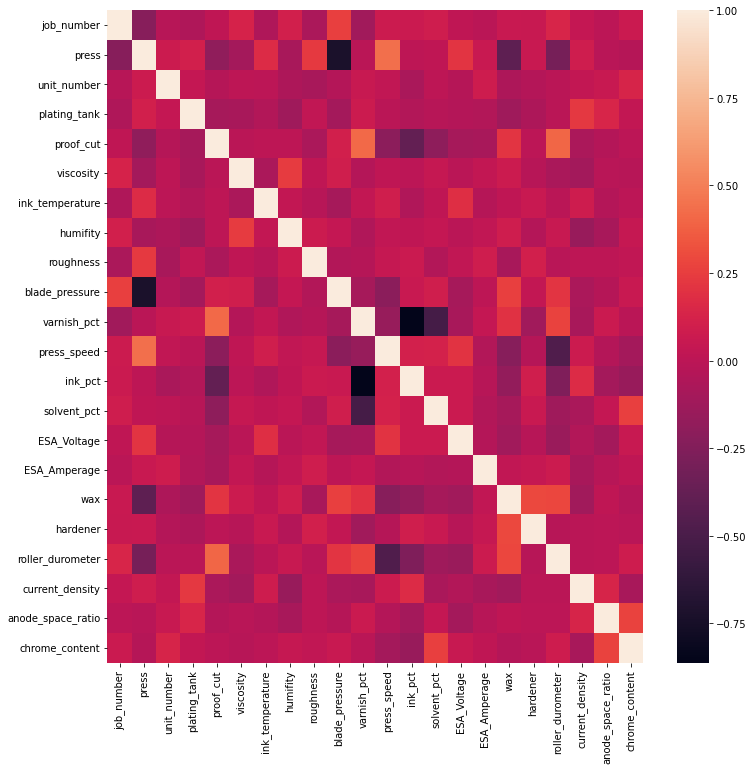

In [ ]:
numeric_cols = ["timestamp",
"job_number",
"press",
"unit_number",
"plating_tank",
"proof_cut",
"viscosity",
"caliper",
"ink_temperature",
"humifity",
"roughness",
"blade_pressure",
"varnish_pct",
"press_speed",
"ink_pct",
"solvent_pct",
"ESA_Voltage",
"ESA_Amperage",
"wax",
"hardener",
"roller_durometer",
"current_density",
"anode_space_ratio",
"chrome_content"]
df_numeric = df[numeric_cols].dropna()
ax, fig = plt.subplots(figsize=[12,12])
sns.heatmap(df_numeric.corr())

Корелляция не превышает по модулю 0.9, поэтому дальнейших действий не требуется.

Желательно иметь более одного графика, графики должны быть информативные (по ним Вы сможете сделать выводы)

Посмотрим на количество пропусков в данных

In [ ]:
df.isna().sum()

timestamp                0
cylinder                 1
customer                 0
job_number               1
grain_screened          49
ink_color                0
proof_on_ctd_ink        57
blade_mfg               60
cylinder_division        0
paper_type               0
ink_type                 1
direct_steam            25
solvent_type            56
type_on_cylinder        19
press_type               1
press                    1
unit_number              0
cylinder_size            4
paper_mill_location    157
plating_tank            19
proof_cut               55
viscosity                6
caliper                 28
ink_temperature          4
humifity                 3
roughness               32
blade_pressure          65
varnish_pct             57
press_speed             12
ink_pct                 57
solvent_pct             57
ESA_Voltage             58
ESA_Amperage            56
wax                      8
hardener                 9
roller_durometer        56
current_density          9
a

Видим, что пропусков достаточно много, разберемся как их заполнить

### Обработка датасета

#### Заполнение пропусков

Необходимо обработать все имеющиеся пропуски в датасете для корректной работы моделей.

##### Числовые пропуски

Для начала проще всего заполнить числовые пропуски. Заполнять будем средним арифметическим (однако, если у Вас больше данных о датасете, можете заполнить другим средним, определенным числом, или даже создать модель для предсказания значений данной колонки).

Внимательно смотрим на тип колонок. Например, у `caliper` и `timestamp` тип `object`. При необходимости своевременно выполняем преобразования типов.

In [ ]:
df.caliper.unique()

array(['0.2', '0.3', '0.433', '0.267', '0.367', '0.333', '0.233', nan,
       '0.4', '0.35', '0.283', '0.5', '0.467', '0.167', '0.533', '0.133',
       '0.217', '0.25', '0.300', '0.200', '.200', 'band'], dtype=object)

In [ ]:
df[df.caliper == 'band']

,timestamp,cylinder,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
522,tabloid,NaN,1910,NaN,45,0.200,17,84,0.8125,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df.timestamp == 'tabloid']

,timestamp,cylinder,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
522,tabloid,NaN,1910,NaN,45,0.200,17,84,0.8125,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Как мы видим, 522 строка в датасете является артефактом.

In [ ]:
df.caliper[522] = '0'
df.timestamp[522] = '0'

<ipython-input-16-428dbb2f6e3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.caliper[522] = '0'
<ipython-input-16-428dbb2f6e3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.timestamp[522] = '0'


In [ ]:
df.caliper = df.caliper.astype('float64')
df.timestamp = df.timestamp.astype('int32')

Выполним предобработку числовых колонок.

In [ ]:
df_numeric = df[numeric_cols]

Вычислим среднее для колонок. Если колонка целочисленная, необходимо преобразовать полученное среднее в целое число, это можно сделать методом `round`

In [ ]:
round(32.5)

32

In [ ]:
# При необходимости применяем округление
# means = round(df_numeric.mean())
means = df_numeric.mean()

In [ ]:
df[numeric_cols] = df_numeric.fillna(means)

##### Категориальные пропуски

Столбцы, где возможно упорядочить элементы (где реализовано отношение больше / меньше), либо в которых всего два значения (их еще называют булевыми, биномиальными), очень удобно обрабатывать с помощью подстановки (замены, `mapping`)

Среди столбцов присутствуют столбцы `direct_steam`, `proof_on_ctd_ink`, `grain_screened`, `type_on_cylinder`. Посмотрим на него.

In [ ]:
bool_cols = ['direct_steam', 'proof_on_ctd_ink', 'grain_screened', 'type_on_cylinder']

In [ ]:
df.direct_steam.unique()

array(['NO', 'YES', 'no', nan, '1865'], dtype=object)

Среди значений присутствует интересное `1865`. Разберемся, почему так.

In [ ]:
(df.direct_steam == "1865").sum()

1

Видим, что оно одно, поэтому скорее всего это артефакт. Посмотрим далее.

In [ ]:
df[df.direct_steam == '1865']

,timestamp,cylinder,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
522,0,NaN,1910,37287.531481,45,0.200,17,84,0.8125,27,...,38.567645,1.319358,0.038144,2.400938,0.987594,34.775258,39.056391,103.032791,99.598881,NaN


In [ ]:
df[df.proof_on_ctd_ink == '17']

,timestamp,cylinder,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
522,0,NaN,1910,37287.531481,45,0.200,17,84,0.8125,27,...,38.567645,1.319358,0.038144,2.400938,0.987594,34.775258,39.056391,103.032791,99.598881,NaN


In [ ]:
df[df.grain_screened == '45']

,timestamp,cylinder,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
522,0,NaN,1910,37287.531481,45,0.200,17,84,0.8125,27,...,38.567645,1.319358,0.038144,2.400938,0.987594,34.775258,39.056391,103.032791,99.598881,NaN


Видим, что 522 строка неинформативная (среди булевских переменных она не является информативной), поэтому удалим ее из датасета.

In [ ]:
df = df.drop(522, axis=0)

In [ ]:
df.direct_steam.unique()

array(['NO', 'YES', 'no', nan], dtype=object)

In [ ]:
df.proof_on_ctd_ink.unique()

array(['YES', 'NO', nan], dtype=object)

Напишем общий код обработки булевых колонок.
Пропуски заполняем модой.

In [ ]:
def prepare_bool_cols(df, cols):
  map_bool_cols = {
      'NO': 0,
      'YES': 1,
      'no': 0,
      'yes': 1,
      pd.NA: pd.NA,
  }
  for col in cols:
    mode = df[col].map(map_bool_cols).mode()[0]
    df[col] = df[col].map(map_bool_cols)
    df[col].fillna(mode, inplace=True)
    df[col] = df[col].astype('uint8')
  return df

In [ ]:
df = prepare_bool_cols(df, bool_cols)

Убедимся, что остались только числовые значения

In [ ]:
df.proof_on_ctd_ink.unique()

array([1, 0], dtype=uint8)

Не всегда два значения - это `yes`, `no` и их эквиваленты. Рассмотрим столбец `band_type`.

In [ ]:
df.band_type.unique()

array(['band', 'noband', nan], dtype=object)

Данный признак является булевым, несмотря на то, что явно значения да и нет не прописаны. Предобработаем его. Для информативности переименуем его.

In [ ]:
map_band = {
      'band': 1,
      'noband': 0,
      pd.NA: pd.NA,
}
mode = df.band_type.map(map_band).mode()[0]
df['band'] = df.band_type.map(map_band)
df.drop('band_type', axis=1, inplace=True)
df.band.fillna(mode, inplace=True)
df.band = df.band.astype('uint8')

Рассмотрим обработку признака, содержащего множественные значения.

Колонка `press_type` содержит в себе два значения - тип и индекс. Выделим их.

In [ ]:
df.press_type.unique()

array(['Motter94', 'WoodHoe70', 'Albert70', 'Motter70'], dtype=object)

In [ ]:
df.press_type.fillna(df.press_type.mode()[0], inplace=True)

In [ ]:
def last_letters(s: str, num: int):
  return s[-num:]

def first_letters(s: str, num: int):
  return s[:-num]

In [ ]:
types = [df.press_type.apply(last_letters, args=(2,)), df.press_type.apply(first_letters, args=(2,))]
types

[0      94
 1      94
 2      70
 3      70
 4      70
        ..
 536    94
 537    70
 538    94
 539    94
 540    70
 Name: press_type, Length: 540, dtype: object, 0       Motter
 1       Motter
 2      WoodHoe
 3      WoodHoe
 4      WoodHoe
         ...   
 536     Motter
 537     Albert
 538     Motter
 539     Motter
 540     Albert
 Name: press_type, Length: 540, dtype: object]

Вместо исходного столбца создадим два новых

In [ ]:
df.drop(["press_type"], axis=1, inplace=True)

In [ ]:
df["press_type"] = types[1]

In [ ]:
df["press_type_idx_70"] = types[0]
map_press_type_idx = {
    '70': 1,
    '94': 0
}
df.press_type_idx_70 = df.press_type_idx_70.map(map_press_type_idx).astype("uint8")

Аналогичным образом можно обрабатывать другие признаки с множественными значениями.

Теперь пришло время заполнить все остальные пропуски. Будем заполнять модой.

In [ ]:
categorical_cols = ["cylinder",
"customer",
"job_number",
"ink_color",
"blade_mfg",
"cylinder_division",
"paper_type",
"ink_type",
"solvent_type",
"press_type",
"press",
"unit_number",
"cylinder_size",
"paper_mill_location",
"plating_tank"]

Заполним пропуски модой

In [ ]:
for col in categorical_cols:
  df[col].fillna(df[col].mode())

И преобразуем значения в числовые

In [ ]:
df = pd.get_dummies(data=df, columns=categorical_cols)

Предобработка завершена. Убедимся в этом.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 540
Columns: 859 entries, timestamp to plating_tank_1911.0
dtypes: float64(19), int32(1), uint8(839)
memory usage: 528.9 KB


In [ ]:
df.columns[df.isna().sum() > 0]

Index([], dtype='object')

#### Удаление пропусков

Предупреждение.

Удаление пропусков не рекомендуется делать без явной причины, поскольку теряется полезная информация. Однако, если по каким-то причинам нежелательно заполнение пропусков (например, 1 пропуск в датасете из 10000+ строк), то строки с пропусками можно удалить.

In [ ]:
df.dropna(inplace=True)

### Сохранение датасета

In [ ]:
df.to_csv("df_preprocessed.csv", encoding="utf-8", sep=';', index=False)

Не забудьте сохранить данный файл на Google Drive

In [ ]:
df.to_csv("/content/drive/MyDrive/datasets/df_preprocessed.csv", encoding="utf-8", sep=';', index=False)